In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
import datetime

import scipy
import statsmodels.api as sm 
from statsmodels.graphics import tsaplots
import pylab
import scipy.stats as stats
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 300)


In [61]:
start_date = datetime.datetime(2000,3,1)
end_date   = datetime.datetime(2020,3,1)

In [62]:
tickers = ['^BVSP']
ibov = yf.download(tickers=tickers, start=start_date, end = end_date, rounding=True)[['Adj Close']]

[*********************100%%**********************]  1 of 1 completed


In [63]:
fig = px.line(ibov['Adj Close'], facet_col_wrap=1)
fig.update_yaxes(matches=None)

fig.update_layout(
    title={
        'text': "Adjusted Close Prices IBOV"})

fig.show()

In [64]:
ibov['log_return'] = np.log(ibov['Adj Close']/ibov['Adj Close'].shift(1))
fig = px.line(ibov['log_return'], facet_col_wrap=1)
fig.update_yaxes(matches=None)
fig.update_layout(
    title={
        'text': "IBOV Log Returns"})
fig.show()

In [65]:
ibov_w = ibov[['Adj Close']].copy()
ibov_w = ibov_w.asfreq('W-FRI', method='pad')
ibov_w['log_return_w'] = np.log(ibov_w['Adj Close']/ibov_w['Adj Close'].shift(1))
ibov_w.head()

,Adj Close,log_return_w
Date,,
2000-03-03,18632.0,NaN
2000-03-10,18280.0,-0.019073
2000-03-17,17511.0,-0.042978
2000-03-24,18675.0,0.064356
2000-03-31,17820.0,-0.046864


In [66]:
fig = px.line(ibov_w['log_return_w'], facet_col_wrap=1)
fig.update_yaxes(matches=None)
fig.update_layout(
    title={
        'text': "IBOV Weekly Log Returns"})
fig.show()

In [67]:
ibov_m = ibov[['Adj Close']].copy()
ibov_m = ibov_m.asfreq('M', method='pad')
ibov_m['log_return_m'] = np.log(ibov_m['Adj Close']/ibov_m['Adj Close'].shift(1))
ibov_m.head()

,Adj Close,log_return_m
Date,,
2000-03-31,17820.0,NaN
2000-04-30,15538.0,-0.137033
2000-05-31,14957.0,-0.038109
2000-06-30,16728.0,0.111905
2000-07-31,16455.0,-0.016455


In [68]:
fig = px.line(ibov_m['log_return_m'], facet_col_wrap=1)
fig.update_yaxes(matches=None)
fig.update_layout(
    title={
        'text': "IBOV Monthly Log Returns"})
fig.show()

- A alta volatilidade durante os per´ıodos de 2008 e 2020 ´e mais vis´ıvel no gr´afico di´ario.
- Em contraste aos prec¸os, os retornos oscilam ao redor de um n´ıvel constante, pr´oximo de zero.
- Al´em disso, altas oscilac¸˜oes tendem a “se agrupar”, refletindo per´ıodos mais vol´ateis do mercado.
- Estas caracter´ısticas tamb´em s˜ao aparentes nos dados da PETR4, a seguir.

In [69]:
petr4 = ['PETR4.SA']
petr4 = yf.download(tickers=petr4, start=start_date, end = end_date, rounding=True)[['Adj Close']]

[*********************100%%**********************]  1 of 1 completed


In [70]:
fig = px.line(petr4['Adj Close'], facet_col_wrap=1)
fig.update_yaxes(matches=None)
fig.update_layout(
    title={
        'text': "Adjusted Close Prices PETR4"})
fig.show()

In [71]:
petr4['log_return'] = np.log(petr4['Adj Close']/petr4['Adj Close'].shift(1))
fig = px.line(petr4['log_return'], facet_col_wrap=1)
fig.update_yaxes(matches=None)
fig.update_layout(
    title={
        'text': "PETR4 Log Returns"})
fig.show()

In [72]:
petr4_w = petr4[['Adj Close']].copy()
petr4_w = petr4_w.asfreq('W-FRI', method='pad')
petr4_w['log_return_w'] = np.log(petr4_w['Adj Close']/petr4_w['Adj Close'].shift(1))

fig = px.line(petr4_w['log_return_w'], facet_col_wrap=1)
fig.update_yaxes(matches=None)
fig.update_layout(
    title={
        'text': "PETR4 Weekly Log Returns"})
fig.show()


In [73]:
petr4_m = petr4[['Adj Close']].copy()
petr4_m = petr4_m.asfreq('M', method='pad')
petr4_m['log_return_m'] = np.log(petr4_m['Adj Close']/petr4_m['Adj Close'].shift(1))

fig = px.line(petr4_m['log_return_m'], facet_col_wrap=1)
fig.update_yaxes(matches=None)
fig.update_layout(
    title={
        'text': "PETR4 Monthly Log Returns"})
fig.show()


### Distribuições

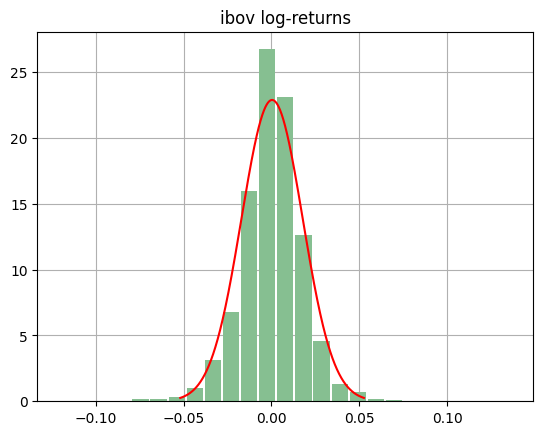

In [74]:
port_mean = ibov['log_return'].mean()
port_stdev = ibov['log_return'].std()

x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev, 1000)

ibov['log_return'].hist(bins=25, density=True, grid=True, color='#86bf91', zorder=2, rwidth=0.9)
plt.title('ibov log-returns')
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r");

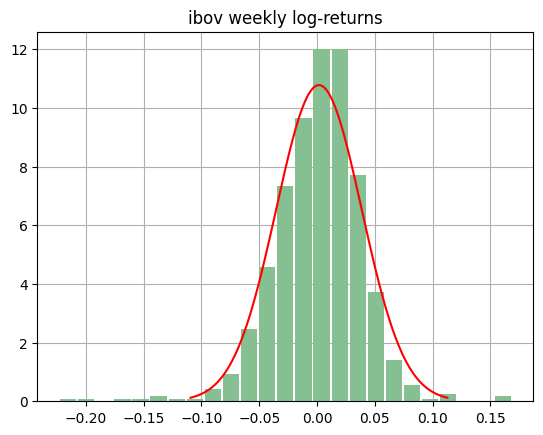

In [75]:
port_mean_w = ibov_w['log_return_w'].mean()
port_stdev_w = ibov_w['log_return_w'].std()

x_w = np.linspace(port_mean_w - 3*port_stdev_w, port_mean_w+3*port_stdev_w, 1000)

ibov_w['log_return_w'].hist(bins=25, density=True, grid=True, color='#86bf91', zorder=2, rwidth=0.9)
plt.title('ibov weekly log-returns')
plt.plot(x_w, scipy.stats.norm.pdf(x_w, port_mean_w, port_stdev_w), "r");

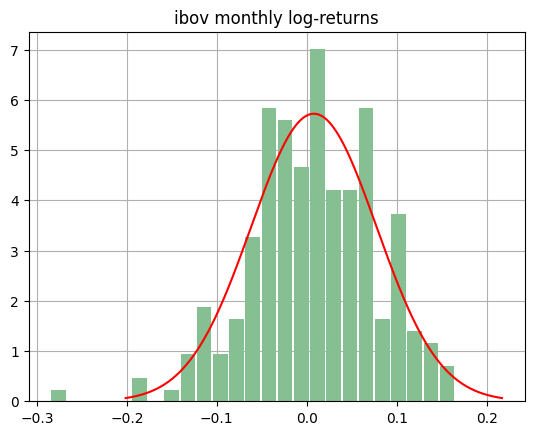

In [76]:
port_mean_m = ibov_m['log_return_m'].mean()
port_stdev_m = ibov_m['log_return_m'].std()

x_m = np.linspace(port_mean_m - 3*port_stdev_m, port_mean_m+3*port_stdev_m, 1000)

ibov_m['log_return_m'].hist(bins=25, density=True, grid=True, color='#86bf91', zorder=2, rwidth=0.9)
plt.title('ibov monthly log-returns')
plt.plot(x_m, scipy.stats.norm.pdf(x_m, port_mean_m, port_stdev_m), "r");

<Axes: >

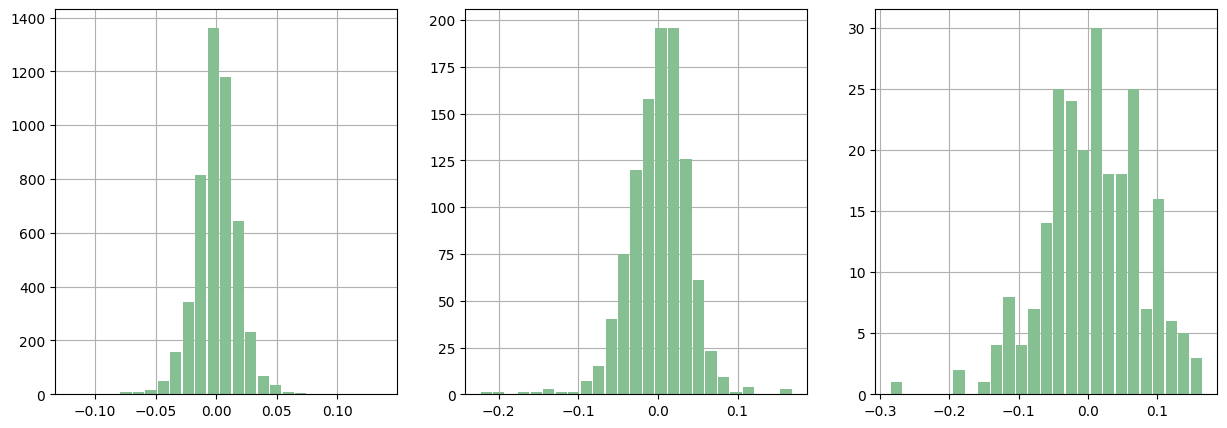

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ibov['log_return'].hist(bins=25, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=axes[0])
ibov_w['log_return_w'].hist(bins=25, grid=True,  color='#86bf91', zorder=2, rwidth=0.9, ax=axes[1])
ibov_m['log_return_m'].hist(bins=25, grid=True,  color='#86bf91', zorder=2, rwidth=0.9, ax=axes[2])

### Are stock returns normally distributed ?

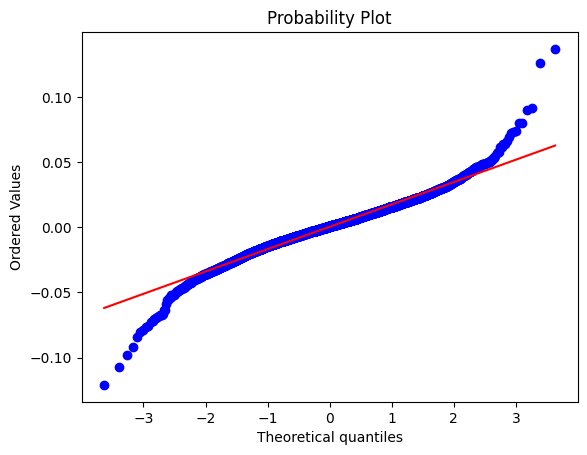

In [78]:
fig = plt.figure()
log_returns = ibov[['log_return']].dropna()
stats.probplot(log_returns['log_return'], dist='norm', plot=pylab);

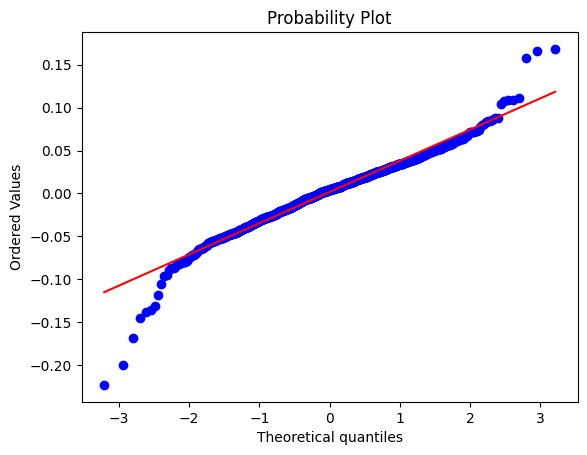

In [79]:
log_returns_w = ibov_w[['log_return_w']].dropna()
stats.probplot(log_returns_w['log_return_w'], dist='norm', plot=pylab);

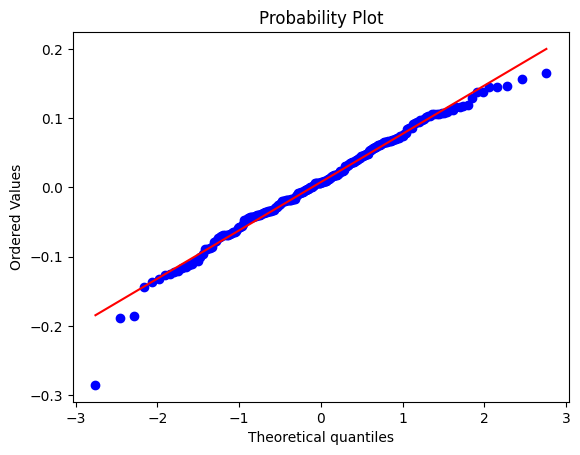

In [80]:
log_returns_m = ibov_m[['log_return_m']].dropna()
stats.probplot(log_returns_m['log_return_m'], dist='norm', plot=pylab);

 - As caudas das distribuições dos retornos são mais pesadas que àquelas da distribuição normal.
 - Nos gráficos Q-Q: a cauda esquerda está abaixo da linha preta, e a cauda direita está acima da linha preta.
 - Quando o intervalo dos retornos aumenta entre um dia, uma semana e um mês, as caudas das distribuições se tornam mais leves.
 - Em particular, a distribuição dos retornos mensais é relativamente próxima da distribuição normal.
 - As distribuições são de certa forma assimétricas devido à presença de retornos altos negativos/positivos.
 - Padrões similares podem ser observados nos dados de log-retornos da PETR4; a seguir.

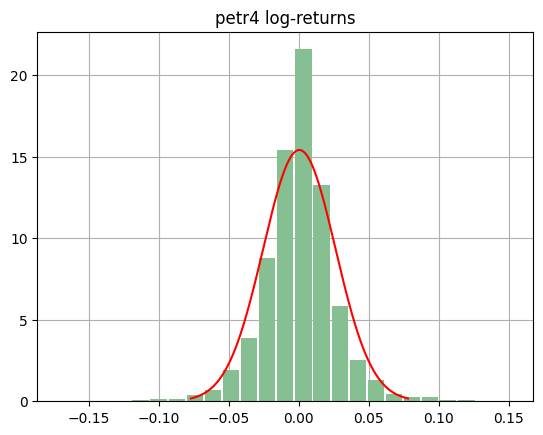

In [81]:
port_mean = petr4['log_return'].mean()
port_stdev = petr4['log_return'].std()

x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev, 1000)

petr4['log_return'].hist(bins=25, density=True, grid=True, color='#86bf91', zorder=2, rwidth=0.9)
plt.title('petr4 log-returns')
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r");

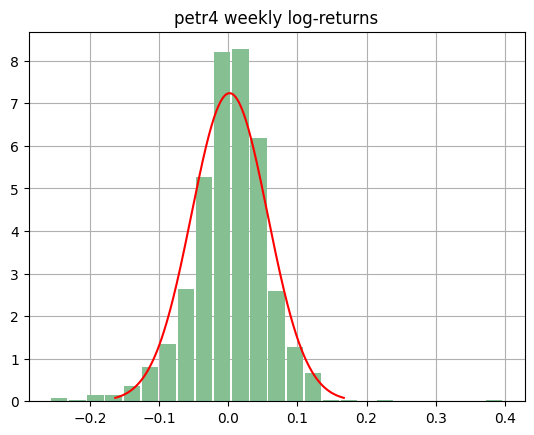

In [82]:
port_mean_w = petr4_w['log_return_w'].mean()
port_stdev_w = petr4_w['log_return_w'].std()

x_w = np.linspace(port_mean_w - 3*port_stdev_w, port_mean_w+3*port_stdev_w, 1000)

petr4_w['log_return_w'].hist(bins=25, density=True, grid=True, color='#86bf91', zorder=2, rwidth=0.9)
plt.title('petr4 weekly log-returns')
plt.plot(x_w, scipy.stats.norm.pdf(x_w, port_mean_w, port_stdev_w), "r");

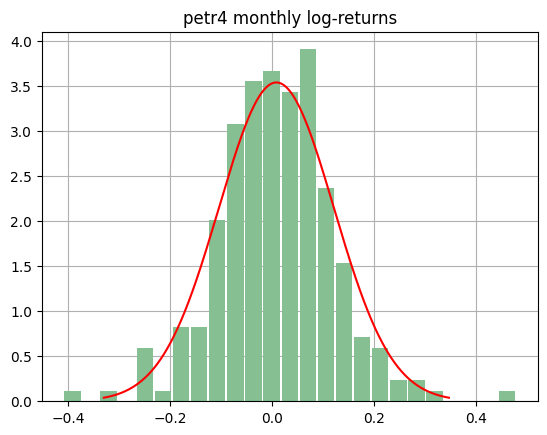

In [83]:
port_mean_m = petr4_m['log_return_m'].mean()
port_stdev_m = petr4_m['log_return_m'].std()

x_m = np.linspace(port_mean_m - 3*port_stdev_m, port_mean_m+3*port_stdev_m, 1000)

petr4_m['log_return_m'].hist(bins=25, density=True, grid=True, color='#86bf91', zorder=2, rwidth=0.9)
plt.title('petr4 monthly log-returns')
plt.plot(x_m, scipy.stats.norm.pdf(x_m, port_mean_m, port_stdev_m), "r");

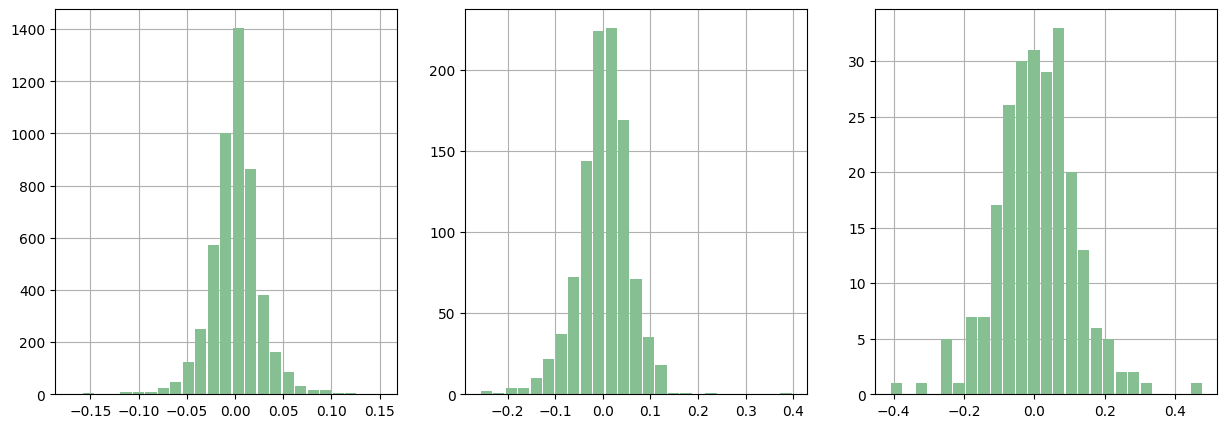

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

petr4['log_return'].hist(bins=25, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=axes[0])
petr4_w['log_return_w'].hist(bins=25, grid=True,  color='#86bf91', zorder=2, rwidth=0.9, ax=axes[1])
petr4_m['log_return_m'].hist(bins=25, grid=True,  color='#86bf91', zorder=2, rwidth=0.9, ax=axes[2]);

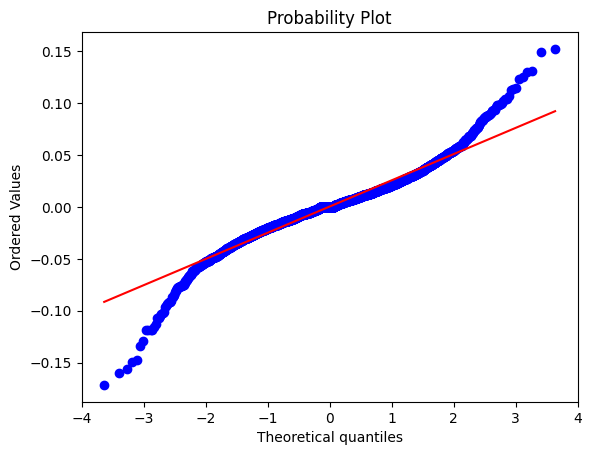

In [85]:
fig = plt.figure()
log_returns = petr4[['log_return']].dropna()
stats.probplot(log_returns['log_return'], dist='norm', plot=pylab);

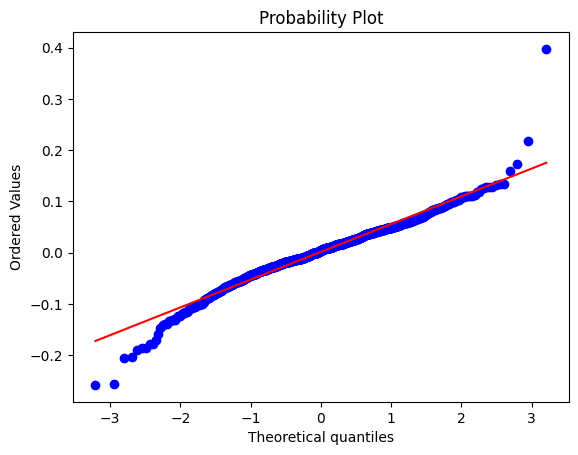

In [86]:
log_returns_w = petr4_w[['log_return_w']].dropna()
stats.probplot(log_returns_w['log_return_w'], dist='norm', plot=pylab);

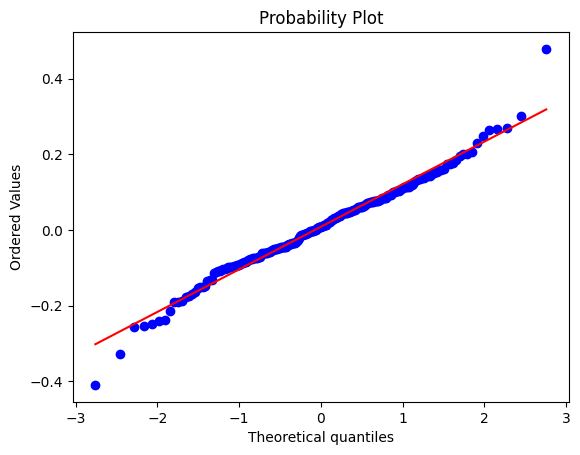

In [87]:
log_returns_m = petr4_m[['log_return_m']].dropna()
stats.probplot(log_returns_m['log_return_m'], dist='norm', plot=pylab);

### Funções de Autocorrelação (FAC).

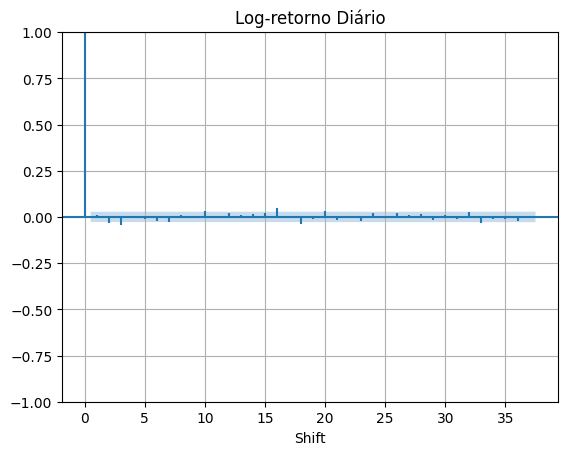

In [88]:
fig = tsaplots.plot_acf(ibov[['log_return']].dropna(), marker='')
plt.title('Log-retorno Diário')
plt.xlabel('Shift')
plt.grid(True)
plt.show()

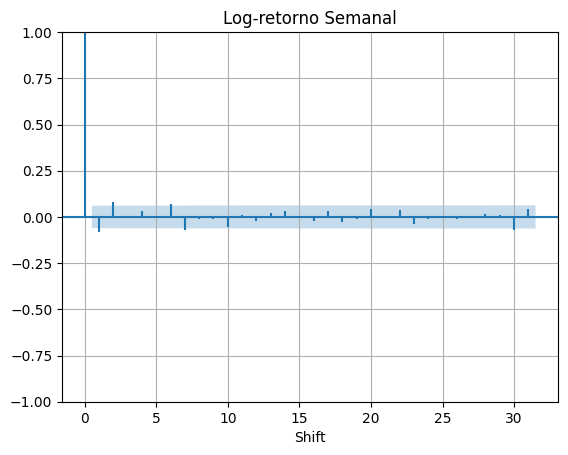

In [89]:
fig = tsaplots.plot_acf(ibov_w[['log_return_w']].dropna(), marker='')
plt.title('Log-retorno Semanal')
plt.xlabel('Shift')
plt.grid(True)
plt.show()

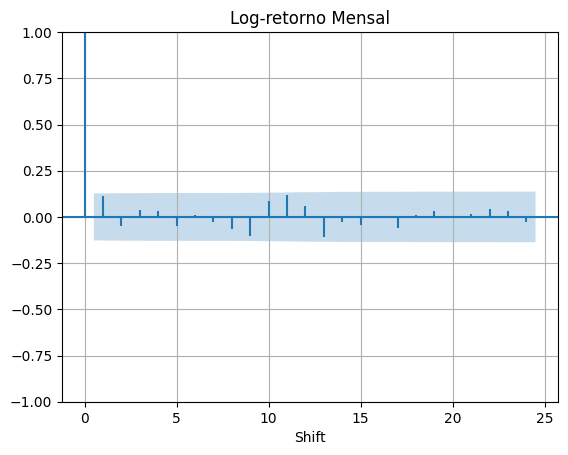

In [90]:
fig = tsaplots.plot_acf(ibov_m[['log_return_m']].dropna(), marker='')
plt.title('Log-retorno Mensal')
plt.xlabel('Shift')
plt.grid(True)
plt.show()

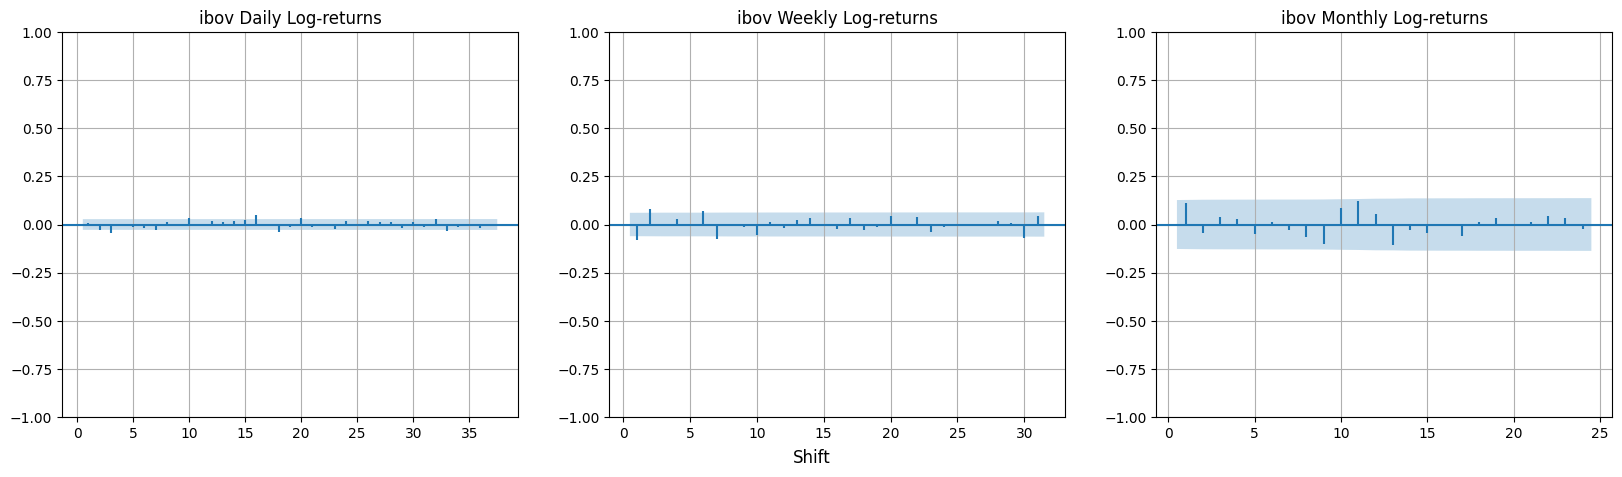

In [91]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
sm.graphics.tsa.plot_acf(ibov[['log_return']].dropna(), marker='', zero=False, ax=ax[0])
sm.graphics.tsa.plot_acf(ibov_w[['log_return_w']].dropna(), marker='', zero=False, ax=ax[1])
sm.graphics.tsa.plot_acf(ibov_m[['log_return_m']].dropna(), marker='', zero=False, ax=ax[2])

ax[0].title.set_text('ibov Daily Log-returns')
ax[0].grid(True)
ax[1].title.set_text('ibov Weekly Log-returns')
ax[1].grid(True)
ax[2].title.set_text('ibov Monthly Log-returns')
ax[2].grid(True)

fig.supxlabel('Shift')

plt.show()

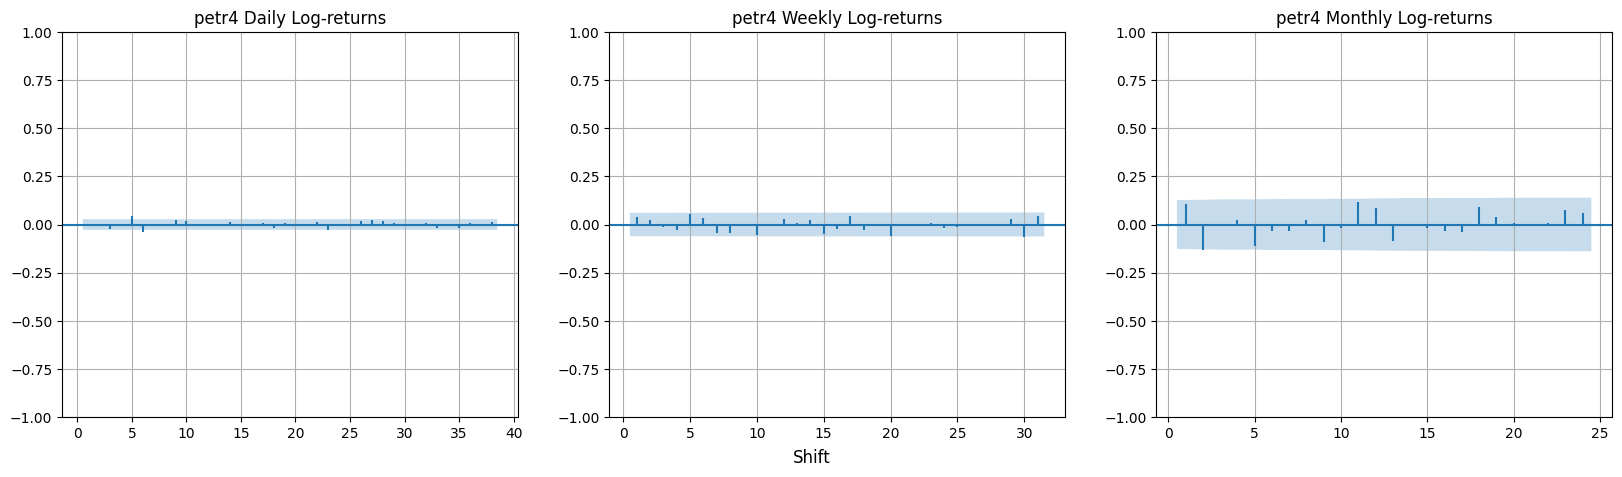

In [92]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
sm.graphics.tsa.plot_acf(petr4[['log_return']].dropna(), marker='', zero=False, ax=ax[0])
sm.graphics.tsa.plot_acf(petr4_w[['log_return_w']].dropna(), marker='', zero=False, ax=ax[1])
sm.graphics.tsa.plot_acf(petr4_m[['log_return_m']].dropna(), marker='', zero=False, ax=ax[2])

ax[0].title.set_text('petr4 Daily Log-returns')
ax[0].grid(True)
ax[1].title.set_text('petr4 Weekly Log-returns')
ax[1].grid(True)
ax[2].title.set_text('petr4 Monthly Log-returns')
ax[2].grid(True)

fig.supxlabel('Shift')

plt.show()

As duas linhas horizontais listradas, que são definidas como $±1.96/\sqrt{T}$, são os limites do intervalo de confiança em 95% para $\rho_{k}$ se o valor real de $\rho_{k} = 0$. Logo $\rho_{k}$ seria visto como não significativamente diferente de zero se a estimativa $\rho_{k}$ estiver entre estas linhas.

É possível observar que todos os log-retornos diários, semanais e mensais para tanto o índice IBOV quanto para a PETR4 não exibem autocorrelação siginificativa. Isso corrobora a hipótese que retornos de um ativo financeiro sãoo não-correlacionados através do tempo.

Text(0.5, 0.01, 'Shift')

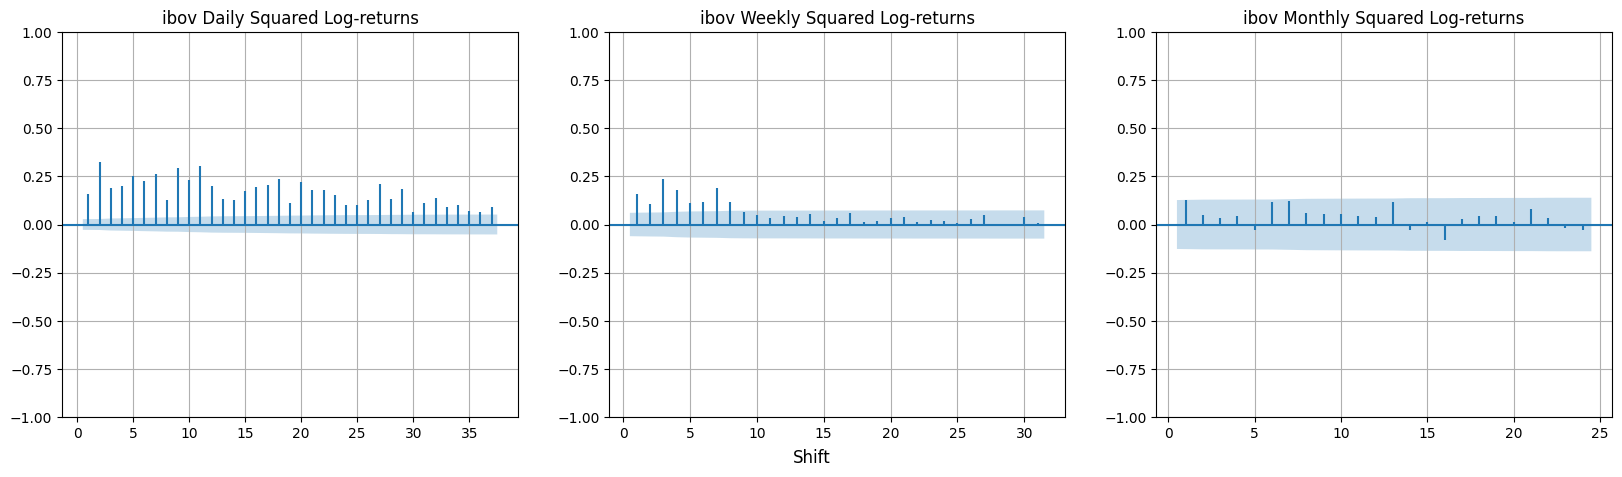

In [93]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
sm.graphics.tsa.plot_acf(pow(ibov[['log_return']].dropna(), 2), marker='', zero=False, ax=ax[0])
sm.graphics.tsa.plot_acf(pow(ibov_w[['log_return_w']].dropna(), 2), marker='', zero=False, ax=ax[1])
sm.graphics.tsa.plot_acf(pow(ibov_m[['log_return_m']].dropna(), 2), marker='', zero=False, ax=ax[2])

ax[0].title.set_text('ibov Daily Squared Log-returns')
ax[0].grid(True)
ax[1].title.set_text('ibov Weekly Squared Log-returns')
ax[1].grid(True)
ax[2].title.set_text('ibov Monthly Squared Log-returns')
ax[2].grid(True)

fig.supxlabel('Shift')

Text(0.5, 0.01, 'Shift')

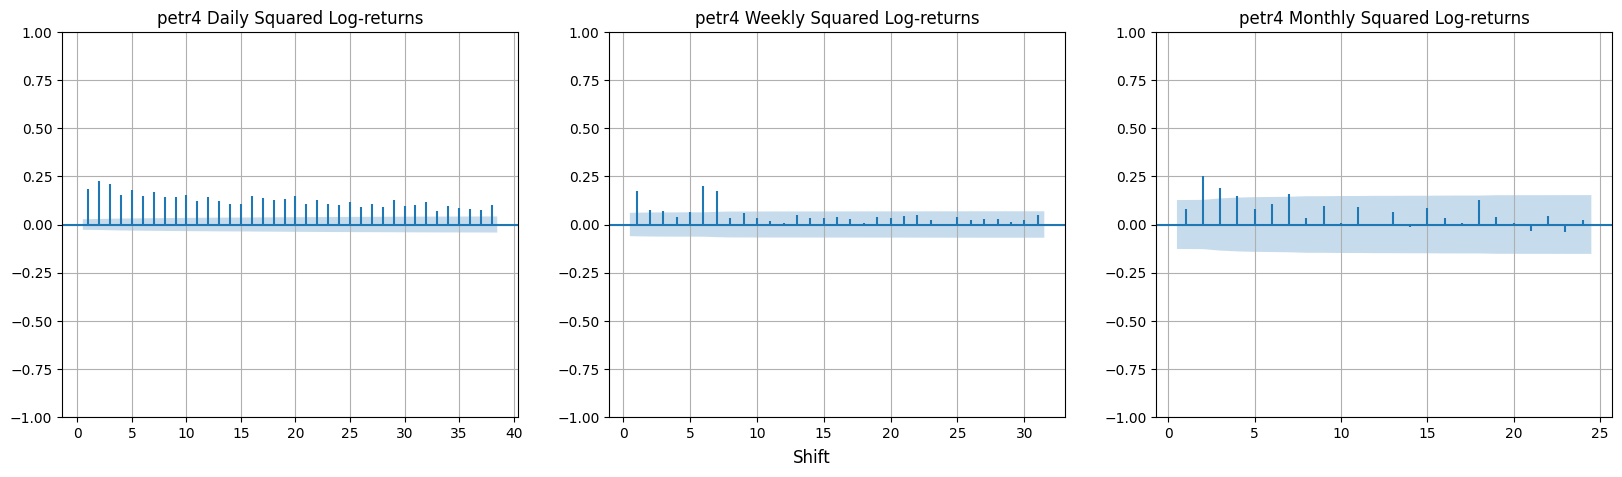

In [94]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
sm.graphics.tsa.plot_acf(pow(petr4[['log_return']].dropna(), 2), marker='', zero=False, ax=ax[0])
sm.graphics.tsa.plot_acf(pow(petr4_w[['log_return_w']].dropna(), 2), marker='', zero=False, ax=ax[1])
sm.graphics.tsa.plot_acf(pow(petr4_m[['log_return_m']].dropna(), 2), marker='', zero=False, ax=ax[2])

ax[0].title.set_text('petr4 Daily Squared Log-returns')
ax[0].grid(True)
ax[1].title.set_text('petr4 Weekly Squared Log-returns')
ax[1].grid(True)
ax[2].title.set_text('petr4 Monthly Squared Log-returns')
ax[2].grid(True)

fig.supxlabel('Shift')

Text(0.5, 0.01, 'Shift')

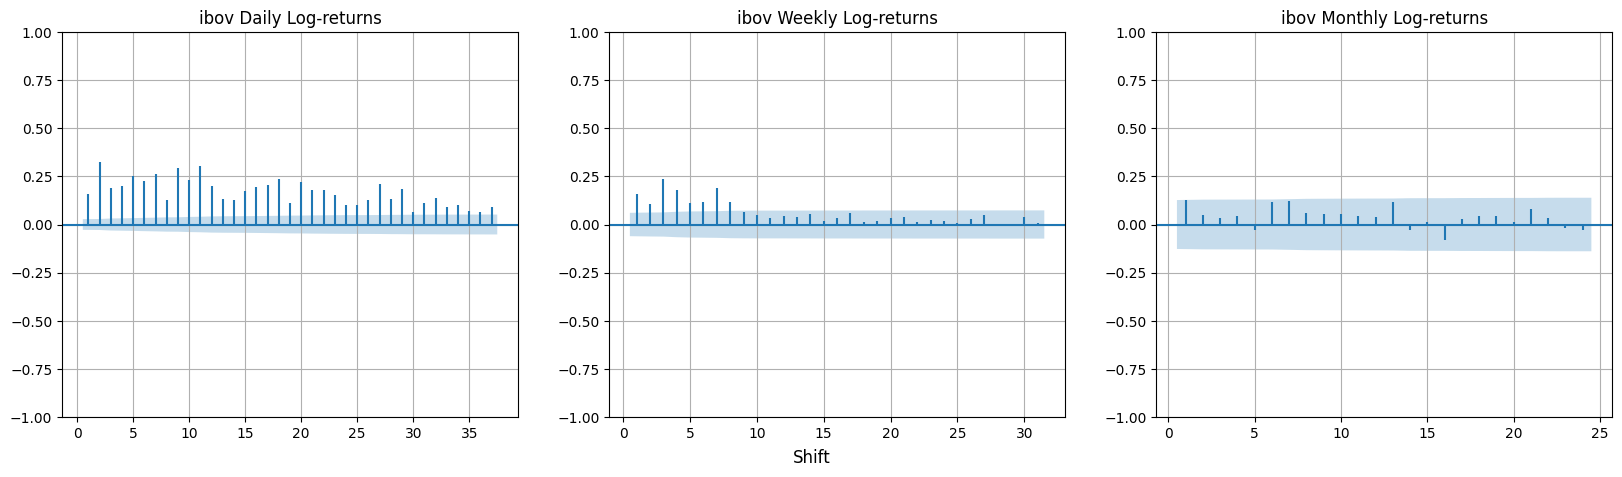

In [95]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
sm.graphics.tsa.plot_acf(pow(ibov[['log_return']].dropna(), 2), marker='', zero=False, ax=ax[0])
sm.graphics.tsa.plot_acf(pow(ibov_w[['log_return_w']].dropna(), 2), marker='', zero=False, ax=ax[1])
sm.graphics.tsa.plot_acf(pow(ibov_m[['log_return_m']].dropna(), 2), marker='', zero=False, ax=ax[2])

ax[0].title.set_text('ibov Daily Log-returns')
ax[0].grid(True)
ax[1].title.set_text('ibov Weekly Log-returns')
ax[1].grid(True)
ax[2].title.set_text('ibov Monthly Log-returns')
ax[2].grid(True)

fig.supxlabel('Shift')

Text(0.5, 0.01, 'Shift')

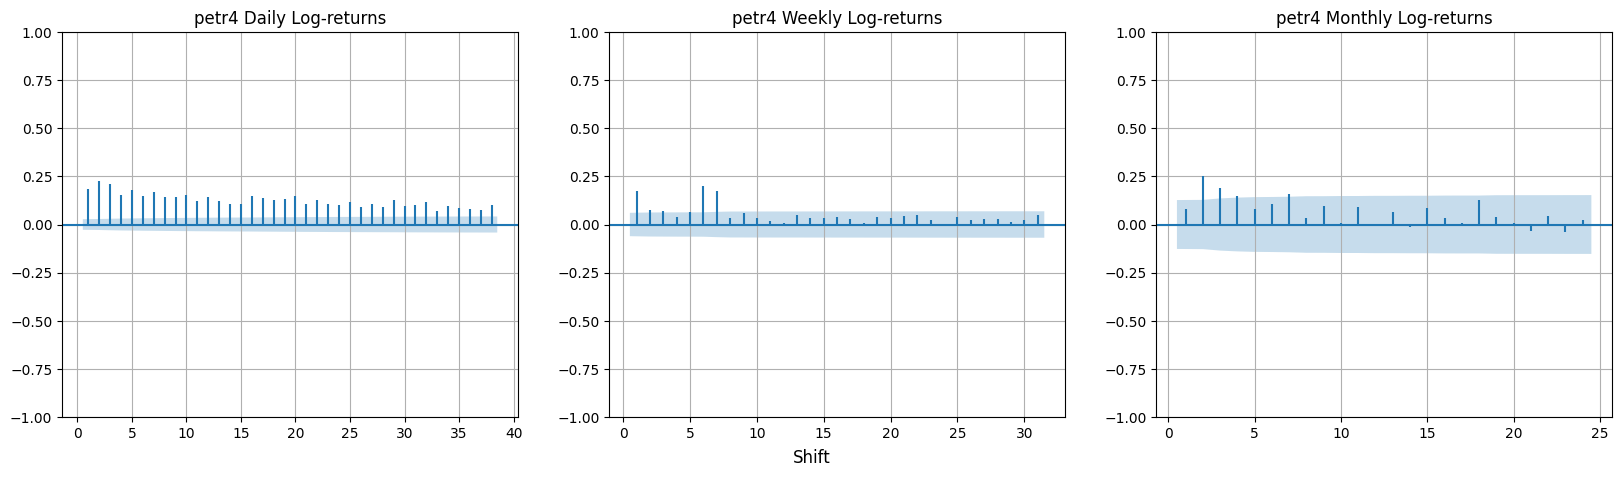

In [96]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
sm.graphics.tsa.plot_acf(pow(petr4[['log_return']].dropna(), 2), marker='', zero=False, ax=ax[0])
sm.graphics.tsa.plot_acf(pow(petr4_w[['log_return_w']].dropna(), 2), marker='', zero=False, ax=ax[1])
sm.graphics.tsa.plot_acf(pow(petr4_m[['log_return_m']].dropna(), 2), marker='', zero=False, ax=ax[2])

ax[0].title.set_text('petr4 Daily Log-returns')
ax[0].grid(True)
ax[1].title.set_text('petr4 Weekly Log-returns')
ax[1].grid(True)
ax[2].title.set_text('petr4 Monthly Log-returns')
ax[2].grid(True)

fig.supxlabel('Shift')

## Hypothesis Testing

### Kolmogorov Smirnov Test

The test answers the question "What is the probability that this collection of samples could have been drawn from that probability distribution?". The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. The null distribution of this statistic is calculated under the null hypothesis that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case). 

In [108]:
ks_stat, p_value = stats.kstest(ibov['log_return'].dropna(), 'norm')
print('ks statistic:', ks_stat, ', p value:', p_value)
if p_value > 0.05:
    print('Probably Gaussian')
else:
    print('Probably NOT Gaussian')

ks statistic: 0.4751494215911325 , p value: 0.0
Probably NOT Gaussian


In [109]:
ks_stat, p_value = stats.kstest(petr4['log_return'].dropna(), 'norm')
print('ks statistic:', ks_stat, ', p value:', p_value)
if p_value > 0.05:
    print('Probably Gaussian')
else:
    print('Probably NOT Gaussian')

ks statistic: 0.4620281297099202 , p value: 0.0
Probably NOT Gaussian


### Shapiro Wilk Test

The Shapiro–Wilk test is a test of normality in frequentist statistics. 

In [110]:
sw_stat, p_value = stats.shapiro(ibov['log_return'].dropna())
print('sw statistic:', sw_stat, ', p value:', p_value)
if p_value > 0.05:
    print('Probably Gaussian')
else:
    print('Probably NOT Gaussian')

sw statistic: 0.9674059748649597 , p value: 4.612192850899756e-32
Probably NOT Gaussian


In [111]:
sw_stat, p_value = stats.shapiro(petr4['log_return'].dropna())
print('sw statistic:', sw_stat, ', p value:', p_value)
if p_value > 0.05:
    print('Probably Gaussian')
else:
    print('Probably NOT Gaussian')

sw statistic: 0.9514777064323425 , p value: 6.528438229480903e-38
Probably NOT Gaussian


- In the autocorrelation functions for the squared log-returns and absolute value, $r_{t}$ is replaced by $r^2_{t}$ and $|r_{t}|$.
- There are small but significant autocorrelations in $r^2_{t}$ and even larger ones in $|r_{t}|$.
- Autocorrelations are more pronounced and more persistent in daily data compared to weekly or monthly data.
- Empirical evidence indicates returns that are linearly independent of each other, but with some non-linear self-dependence.

The results seen so far, obtained from two series of real data, are in accordance with the so-called stylized facts. Stylized facts are theoretical approximations of empirically observed phenomena. These "facts" are observed across different types of assets, including stocks, portfolios, commodities and currencies.